# ЛР_5(11) Пороговая обработка изображений

### Задание 5.1. Провести пороговую обработку полутонового изображения с плавным изменением интенсивности

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

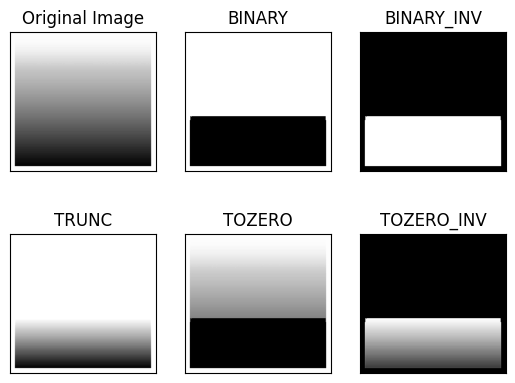

In [2]:
img = cv.imread ("pic/Grad.jpg" , 0)
ret, thresh1 = cv.threshold (img, 127, 255, cv.THRESH_BINARY)
ret, thresh2 = cv.threshold (img, 127, 255, cv.THRESH_BINARY_INV)
ret, thresh3 = cv.threshold (img, 127, 255, cv.THRESH_TRUNC)
ret, thresh4 = cv.threshold (img, 127, 255, cv.THRESH_TOZERO)
ret, thresh5 = cv.threshold (img, 127, 255, cv.THRESH_TOZERO_INV)

title = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])

plt.show ()


### Задание 5.2 Протестировать функции с адаптивным порогом.

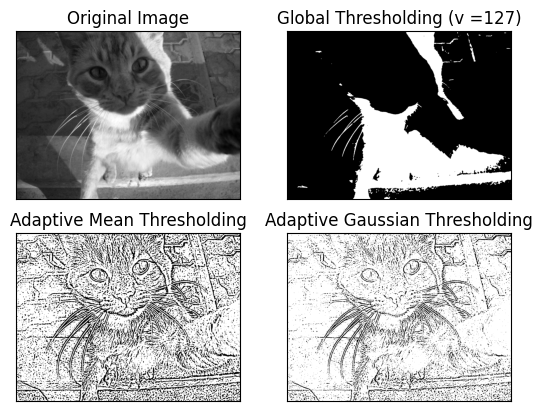

In [3]:
img = cv.imread('pic/CatWithShadow2.jpg',0)
img = cv.medianBlur(img,5)

ret1,th1 = cv.threshold(img,127,255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)

images = [img, th1, th2, th3]
titles = ['Original Image', 'Global Thresholding (v =127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show ()


### Задание 5.3 Загрузить дополнительные модули random, PIL. Создать зашумленное изображение.


In [4]:
import random
from PIL import Image, ImageDraw

In [5]:
import random
from PIL import Image, ImageDraw

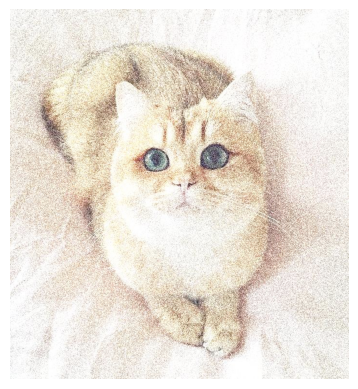

In [6]:
image = Image.open('pic/Cat.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("pic/median.png", "JPEG")


img = cv.imread("pic/median.png", 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB));
plt.axis('off');

### Задание 5.4 На вход программы пороговой обработки подается зашумленное изображение. Это изображение обрабатывается тремя способами. В первом случае используется глобальный порог со значением 127. Во втором случае напрямую применяется порог Оцу. В третьем случае изображение сначала удаляет шум фильтром с гауссовым ядром 5x5, затем применяется пороговая обработка Оцу.

Загрузим изображение и сделаем пошаговую обработку

In [7]:
img = cv.imread('pic/median.png',0)

ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY)

Выполним обработку Оцу

In [8]:
ret2, th2 = cv.threshold(img, 0, 255,cv.THRESH_BINARY+cv.THRESH_OTSU)

Удалим шум с Гауссовым ядром 5х5 и сделаем обработку Оцу

In [9]:
blur = cv.GaussianBlur(img,(5,5),0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

Выведем оригинальное изображение, изображение после обработки и гистограмму обработанного изображения

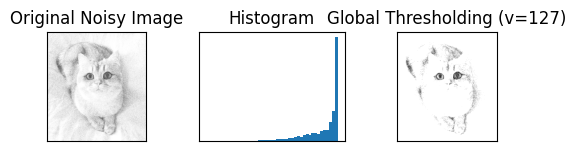

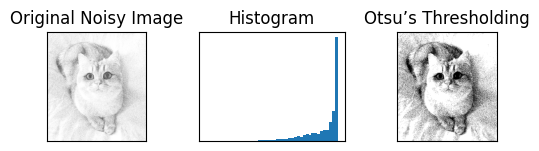

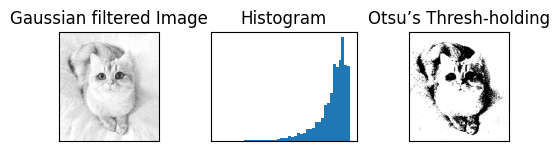

In [10]:
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)','Original Noisy Image', 'Histogram','Otsu’s Thresholding','Gaussian filtered Image','Histogram','Otsu’s Thresh-holding']

for i in range(3):
    plt.subplot(3,3,i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]),
    plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 45)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]),
    plt.yticks([])
    plt.show()